In [1]:
import os

import argparse
import numpy as np
import random
import sys
import time
import shutil
from importlib import import_module
from numbers import Number

import torch
from torch.utils.data import Sampler, DataLoader


from utils import Logger, load_pretrain
import matplotlib.pyplot as plt
from lanegcn import get_model

In [2]:
config, Dataset, collate_fn, net, loss, post_process, opt = get_model()

In [3]:
def worker_init_fn(pid):
    np_seed = int(pid)
    np.random.seed(np_seed)
    random_seed = np.random.randint(2 ** 32 - 1)
    random.seed(random_seed)

dataset = Dataset('./dataset/preprocess/train_crs_dist6_angle90.p', config, train=True)
train_loader = DataLoader(
        dataset,
        batch_size=config["batch_size"],
        num_workers=config["workers"],
        shuffle=False,   # True: At each epoch, reorder the data
        collate_fn=collate_fn,
        pin_memory=True,
        worker_init_fn=worker_init_fn,   # The next 36 were thrown away
        drop_last=True,
    )

In [4]:
data = {}
for i, data in enumerate(train_loader):
    data = dict(data)
    break


print(data.keys())

dict_keys(['city', 'orig', 'gt_preds', 'has_preds', 'theta', 'rot', 'feats', 'ctrs', 'graph', 'trajs2', 'traj1'])


In [5]:
print(len(data['trajs2'][0]))
print(len(data['traj1'][0]))
print(len(data['gt_preds'][0]))

6
6
6


In [9]:
trajs2 = data['trajs2'][0]
traj1 = data['traj1'][0]

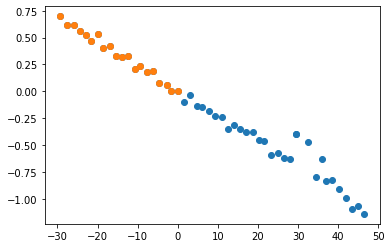

In [12]:
plt.scatter(trajs2[0][:,0], trajs2[0][:,1])
plt.scatter(traj1[0][:,0], traj1[0][:,1])

tensor(1.0266e-05, dtype=torch.float64) tensor(-1.8155e-06, dtype=torch.float64)


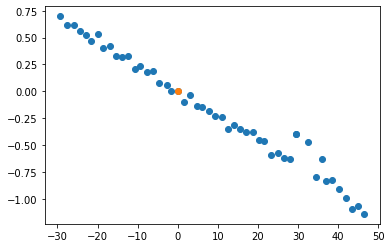

In [ ]:
orig = data['orig'][0]
trajs = data['trajs'][0]
pre = trajs[0][18] - orig
theta = np.pi - np.arctan2(pre[1], pre[0])

rot = np.asarray([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]], np.float32)

trajs = np.matmul(rot, (trajs[0] - orig.reshape(-1, 2)).T).T
plt.scatter(trajs[:,0], trajs[:,1])
plt.scatter(trajs[19,0], trajs[19,1])
print(trajs[19,0], trajs[19,1])

# plt.scatter(traj1[0][:,0], traj1[0][:,1])